<a href="https://colab.research.google.com/github/EliasSf73/Data-Science/blob/main/Copy_of_assignment_1_(problem)_updated.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment #1
- Please fill in the blank cells below. All the expected answers are included in the cell right below.
- Submit this Colab notebook file via KLMS. Our teaching assistants will check your Colab notebook.

- **Colab notebook for code template**
    - https://drive.google.com/file/d/1wfZrURD_XDcdtaqQLIyC3wiW2uAwLyrK/view?usp=drive_link

- **Late Submission Policy**
    - This assignment should be submitted by October 4th (by KST 23:59). The submission delay results in a deduction of 20% of the total score per day. E.g., if it’s delayed by 3 days, the assignment score is “your score * (100-20x3)%”.


## Questions on stock return
Please approach this assignments with the following question in mind.  
- __Q1__. How can we measure the return on investment of stock?    
    * return  (= 수익률) <br>
- __Q2__. Which business day of the week is best for buying stocks?  Or are they indifferent?    
    * business day of the week : Monday, Tuesday, ... , Friday
    * no stock price data on weekends (Saturday, Sunday)<br>
- __Q3__. Are stock returns independent or correlated?
    * Correlation coefficient<br>
- __Q4__. If you are a risk taker, which stock would you buy?
    * risk taker : a person who prefers high risk high return stock
    * cf. risk averse (위험 회피형)
    * cf. risk neutral (위험 중립형)<br>

This assignment will guide you to answer these questions.

In [ ]:
%pip install finance-datareader

import numpy as np
import pandas as pd
import FinanceDataReader as fdr
# import pandas_datareader.data as pdr

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.3/89.3 kB 3.6 MB/s eta 0:00:00


### Task 0. Select stocks and download price data

#### Task 0-1. Download stock price data
- $S = \{s_1, s_2, ..., s_5\}$ : set of stocks
    * Select 5 stocks that you would like to investigate
- Download price data of $S$ from internet using FinanceDataReader
    * start data : ``2017-09-01``
    * end data : ``2024-08-31``
- Make a DataFrame object ``df`` having closing price of all stocks in $S$
- Display the first 5 rows of ``df``
    * hint : df.head()  

- Note 1 : In this homework, we will use FinanceDataReader
    * FinanceDataReader allows you to read either Korean or US stock market data
    * You can install FinaceDataReader as below:
        * pip install finance-datareader
- Note 2 : You can check stocks listed on a market using fdr.StockListing(market_name)
    * krx = fdr.StockListing('KRX')
    * nasdaq = fdr.StockListing('NASDAQ')
- Note 3: You may experience some trouble in reading US stock price data using FinanceDataReader.
    * FinanceDataReader uses investing.com site for getting US stock price data, and investing.com seems to cause problems sometimes.)
    * In that case, you may use pandas_datareader for US stocks.
        * Please refer the following example.
            * pip install finance-datareader
            * import pandas_datareader.data as pdr
            * aapl = pdr.DataReader("AAPL", "stooq", '2016-09-01', '2023-08-31')
        * In this example, "yahoo" site is used as the data source for US stocks.
    


In [ ]:
# fill in this cell for Task 0-1
import FinanceDataReader as fdr
import pandas_datareader.data as pdr

# you should choose your own stock_list
# stock_list = ['AAPL', 'GOOG', 'TSLA', 'FORD', 'AMZN', '005930']
stock_list = ['MSFT', 'KO', 'HSBC', 'AMD', 'TSM']

start = '2017-09-01'
end = '2024-08-31'
### Approach
'''Here is my approach: create an empty dataframe. extract the closing price of each stock. the extracted price will be added as a new column to the
empty data frame. By the end, we have a dataframe with the closing price of each stock.
 '''





################################################################################
# fill this part to obtain df, which contains daily clsoing prices of your stocks
df=pd.DataFrame()

for stock in stock_list:
  stock_data=fdr.DataReader(stock, start, end)
  df[stock]=stock_data['Close']
# hint: use fdr.DataReader(stock, start, end) function and add a colume for each stock to dataframe


################################################################################

df.head()

,MSFT,KO,HSBC,AMD,TSM
2017-09-01,73.940002,45.779999,48.500000,13.19,37.220001
2017-09-05,73.610001,45.919998,47.660000,12.92,36.849998
2017-09-06,73.400002,45.959999,47.580002,12.86,37.270000
2017-09-07,74.339996,46.279999,47.459999,12.63,37.540001
2017-09-08,73.980003,46.299999,47.860001,12.25,37.500000


#### Task 0-2. Write to csv file and read back from it
- Save ``df`` to a csv file "stock_data.csv"
- Read back ``df`` from the saved csv file "stock_data.csv"
    * by reading the stored csv file, you can continue the following tasks even if you have no internet connection
    * use pd.read_csv
        * parse_dates = True : for recognizing date
        * after reading the file, please set the index name to 'Data' using df.index.name = 'Date'
- Display the first 5 rows of ``df``

In [ ]:
################################################################################
# fill in this cell for Task 0-2

''' approach: parse_dates=True; can automatically detect the columns that are date-like
    index_col=0; set the first column as the index instead of 0,1,2...
'''
df.to_csv('stock_data.csv')
df=pd.read_csv('stock_data.csv',parse_dates=True, index_col=0)
df.index.name='Date'





################################################################################

df.head()

,MSFT,KO,HSBC,AMD,TSM
Date,,,,,
2017-09-01,73.940002,45.779999,48.500000,13.19,37.220001
2017-09-05,73.610001,45.919998,47.660000,12.92,36.849998
2017-09-06,73.400002,45.959999,47.580002,12.86,37.270000
2017-09-07,74.339996,46.279999,47.459999,12.63,37.540001
2017-09-08,73.980003,46.299999,47.860001,12.25,37.500000


### Task 1 : __return__ of a stock

#### Task 1-1. Plot monthly average price.
- Choose one stock  $s \in S$
- Compute monthly mean price of $s$
    * use resample
- Plot monthly mean price as below
    * plt.title('title string here')

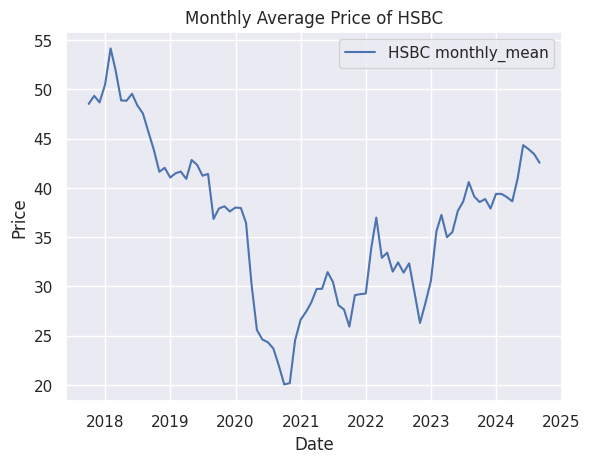

In [ ]:
################################################################################
# fill in this cell for Task 1-1
''' resample(): to group  time series data into different time intervals, such as weekly or monthly--> resmaple('M) means resample by month


'''
hsbc_monthly_mean=df['HSBC'].resample('M').mean()
plt.plot(hsbc_monthly_mean,label='HSBC monthly_mean')
plt.title('Monthly Average Price of HSBC')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


################################################################################


#### Task 1-2. Computing __return__ of stocks.
- Compute daily return $R(s,t)$ for $\forall s \in S$
    * $R(s,t)$ is a daily return for the stock $s$ at date $t$
    * __return__ $R(s,t)$ is defined as $R(s,t)$ = $\Big( \big(P(s,t) - P(s,t-1)\big)/P(s,t-1) \Big) \times 100$
    * __price__ $P(s,t)$ : closing price of the stock $s \in S$ at date $t$
    * hint : consider using df.shift(1) for $P(s, t-1)$
- Compute minimum and maximum of return for each stock given the period
    * hint : use min() and max()
- Store minimum and maximum of return as a DataFrame object (period: start = '2017-09-01', end = '2024-08-31')

In [ ]:
df.columns

Index(['MSFT', 'KO', 'HSBC', 'AMD', 'TSM'], dtype='object')

In [ ]:
################################################################################
''' Daily_Return: the daily return measures how much the stock price changed relative to the previous day.
'''
daily_returns=pd.DataFrame()

for stock in df.columns:
  daily_returns[stock]=(df[stock]-df[stock].shift(1))/(df[stock].shift(1))*100
  # df[stock]=p(s,t) and df[stock].shift(1)=p(s,t-1)

# fill in this cell for Task 1-2
minimum_returns=daily_returns.min()
maximum_returns=daily_returns.max()


# fill in this cell for Task 1-2
returns_information= pd.DataFrame({'Minimum Return':minimum_returns,'Maximum Return':maximum_returns})
returns_information


################################################################################



################################################################################

,Minimum Return,Maximum Return
MSFT,-14.739031,14.216888
KO,-9.672475,6.479572
HSBC,-10.246344,10.368040
AMD,-15.445372,19.948053
TSM,-14.034076,12.652230


### Task 2 : mean __return__ for each day of the week
#### Task 2-1. Computing mean __return__ for each day of the week.
- Compute mean (average) return for each day of the week
    * hint : use groupby() on the dataframe (for daily return) we obtained above. aggregate all the return for the same day and apply the `mean` aggregator function.
- Plot mean return for each day of the week as below.

In [ ]:
print(daily_returns.index.dayofweek.unique())


Index([4, 1, 2, 3, 0], dtype='int32', name='Date')


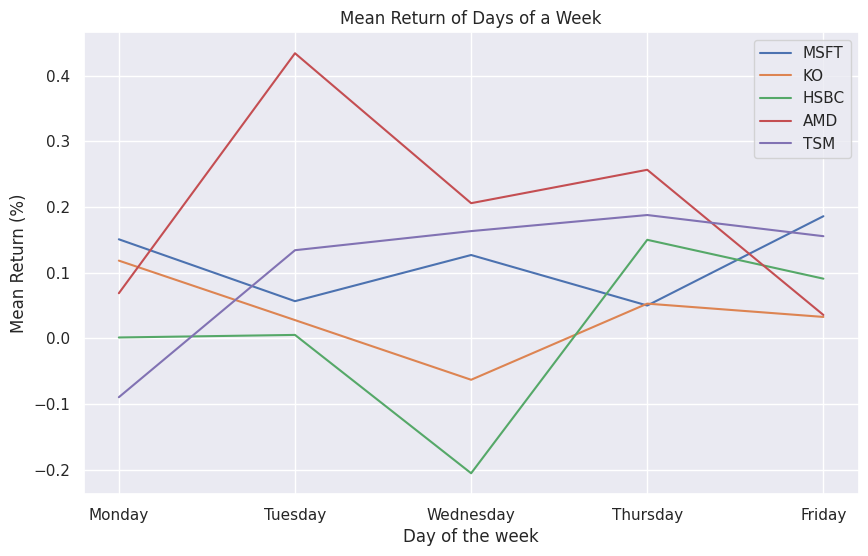

In [ ]:
################################################################################
# fill in this cell for Task 2-1
# mean_returns=daily_returns.groupby(daily_returns.index.dayofweek).mean()
mean_returns = daily_returns.groupby(daily_returns.index.day_name()).mean()

# mean_retuns= mean_returns.reindex(['Monday','Tuesday',"Wednesday",'Thursday','Friday'])
plt.figure(figsize=(10,6))
for stock in mean_returns.columns:
  plt.plot(mean_returns[stock],label=stock)

plt.xticks(ticks=mean_returns.index, labels=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'])

plt.title('Mean Return of Days of a Week')
plt.xlabel('Day of the week')
plt.ylabel('Mean Return (%)')
plt.legend()


# colors = ['blue', 'red', 'green', 'purple', 'orange']
# ax=mean_returns.plot(kind='bar',color=colors)
# plt.title('Mean Return of Days of a Week')
# plt.xlabel('Day of the week')
# plt.ylabel('Mean Return (%)')

plt.show()
################################################################################

#### Task 2-2. When to buy which stock?
- Based on the previous task result, which day of the week is best for buying which stock?  
    * Also, when is worst?
- Briefly state your opinion in the next blank cell with some justification (there is no definitive answer to this).

##### Write your opinion and justification here (Task 2-2).


From the equation 𝑅(𝑠,𝑡) =  ((𝑃(𝑠,𝑡)−𝑃(𝑠,𝑡−1))/𝑃(𝑠,𝑡−1))×100, the daily return measures how much the stock price changed relative to the previous day. Therefore, generally, we want to buy a stock when its price is low or when the returns are negative or small, because lower prices offer a better entry point.

***MSFT***:



***KO***:



***HSBC***:


***AMD***:


***TSM*** :



### Task 3 : Analysis of Return
Here are some basic statistical terms on data $X = \big\{X_t;t=\{1..n\}\big\}$ and $Y = \big\{Y_t;t=\{1..n\}\big\}$
- $\bar{X}$ = $mean(X)$ = $\frac1{n}\sum_{t=1}^{n} X_t$ :
- $var(X) = \frac1{n}\sum_{t=1}^{n} {(X_t-\bar{X})^2}$ : variance
- $std(X) = \sqrt{var(X)}$ : standard deviation
- $cov(X,Y) = \frac1{n}\sum_{t=1}^{n} {(X_t-\bar{X})(Y_t-\bar{Y})}$ : covariance
- $corr(X,Y) = \frac{cov(X,Y)}{std(X)std(Y)}$ : Pearson correlation coef.
    * $ -1 \leq corr(X,Y) \leq +1$


#### Task 3-1. Correlation matrix
- compute daily return of each stock in $S$
    * already done in Task 1-2 ( = daily_return)
- compute correlation matrix between daily returns
    * hint : .corr() function of DataFrame
- plot heatmap as below example
    * make your plot have the same style as the example
    * hint : use seaborn.heatmap() with cmap = 'RdYlBu_r'       

daily return for each stock:
                 AAPL      GOOG      TSLA      FORD      AMZN    005930
Date                                                                  
2017-09-01       NaN       NaN       NaN       NaN       NaN       NaN
2017-09-05 -1.200854 -0.948428 -1.634776  0.000000 -1.326856  0.602410
2017-09-06 -0.104885 -0.068935 -1.447411  0.869569  0.262101  0.513259
2017-09-07 -0.401463  0.877338  1.764728  0.000000  1.205827  2.382979
2017-09-08 -1.630900 -1.009669 -2.056418 -0.862072 -1.385445  1.995012
...              ...       ...       ...       ...       ...       ...
2024-08-26  0.149884  0.298632 -3.227124 -1.758792 -0.869856 -2.059202
2024-08-27  0.374155 -0.922996 -1.876085 -0.767263 -1.356128 -0.394218
2024-08-28 -0.675347 -1.129946 -1.653844 -6.185567 -1.340106  0.791557
2024-08-29  1.457013 -0.668697  0.257594  7.142857  0.772829 -3.141361
2024-08-30 -0.343789  1.046516  3.795812 -4.358976  3.706719  0.405405

[1760 rows x 6 columns]

correlation matrix:
 

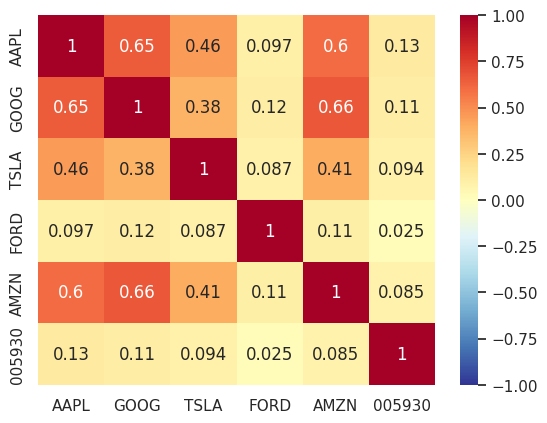

In [ ]:
################################################################################
# fill in this cell for Task 3-1



################################################################################



#### Task 3-2. Most/least correlated pairs of stock
- find the most correlated pair and print as below  
Most  correlated pair : ('AAPL', 'NVDA'), Corr=0.58  
- find the least correlated pair and print as below  
Least correlated pair : ('TSLA', 'NEE'), Corr=0.21

In [ ]:
################################################################################
# fill in this cell for Task 3-2




################################################################################

Most  correlated pair : (GOOG, AMZN), Corr=0.66
Least correlated pair : (FORD, 005930), Corr=0.02


### Task 4 : Characterizing stocks
- Each stock can be characterized by:
    * expected return level (mu) : mean of daily return
    * risk (sigma) : standard deviation of daily return

#### Task 4-1.
- Compute mean return over all days ($\mu^{(s)}$) for $\forall s \in S$
    * use mean() function of DataFrame
- Compute standard deviation of return over all days ($\sigma^{(s)}$) for $\forall s \in S$
    * use std() function of DataFrame
- Plot $\{\left(\sigma^{(s)},\mu^{(s)}\right); s\in S\}$
    * hint : use plt.scatter(), plt.annotate(), plt.xlabel(), plt.ylabel()

mean daily return over all days:
 AAPL      0.116302
GOOG      0.089876
TSLA      0.201564
FORD      0.059930
AMZN      0.097016
005930    0.033139
dtype: float64

std of daily return over all days:
 AAPL      1.922874
GOOG      1.910520
TSLA      3.913644
FORD      5.534071
AMZN      2.165225
005930    1.656261
dtype: float64


Text(0, 0.5, 'Std. daily return')

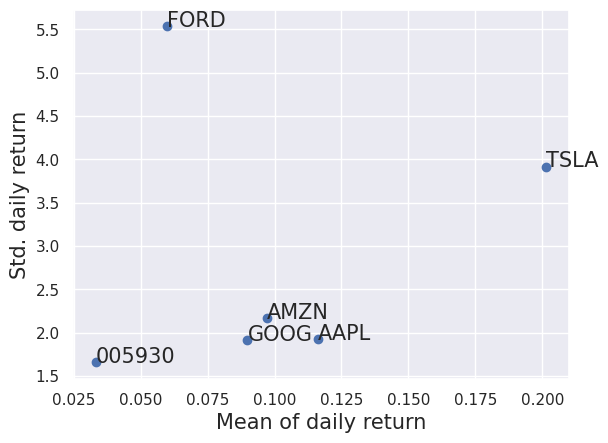

In [ ]:
################################################################################
# fill in this cell for Task 4-1



################################################################################

#### Task 4-2. If you are a risk taker, which stock $s \in S$ would you invest on?
- Choose a stock $s \in S$ for risk taker
    * Briefly justify your answer (there is no definitive answer to this).

##### Write your opinion and justification here (Task 4-2).

#### Task 4-3. Which stock $s \in S$ would you never invest on, regardless of your risk appetite?  
- Choose a stock $s \in S$ that you would not invest on..
    * Explain why.
    * hint : look for a stock dominated by others

##### Write your opinion and explain your reason here (there is no definitive answer to this) (Task 4-3).

[your reason]